**Domestic violence in Colombia**

* Data Cleansing
* Data Visualization
* Build the Model



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data=pd.read_csv(r'../input/domestic-violence-in-colombia/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')
raw_data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [4]:
raw_data.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       2
FECHA HECHO        0
GENERO             3
GRUPO ETARIO    1615
CANTIDAD           0
dtype: int64

**Data Cleansing**

All NA values were replaced with the most frequent value in their column

In [5]:
data=raw_data.copy()
data['ARMAS MEDIOS'].fillna(data['ARMAS MEDIOS'].mode()[0], inplace = True)
data['GENERO'].fillna(data['GENERO'].mode()[0], inplace = True)
data['GRUPO ETARIO'].fillna(data['GRUPO ETARIO'].mode()[0], inplace = True)
data['CODIGO DANE'].fillna(data['CODIGO DANE'].mode()[0], inplace = True)

In [6]:
data.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [7]:
data['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-'],
      dtype=object)

In [8]:
data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1
476967,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44300,FEMENINO,ADULTOS,1
476968,CUNDINAMARCA,TAUSA,25793000,CONTUNDENTES,44294,FEMENINO,ADULTOS,1


**Visualising the Data**


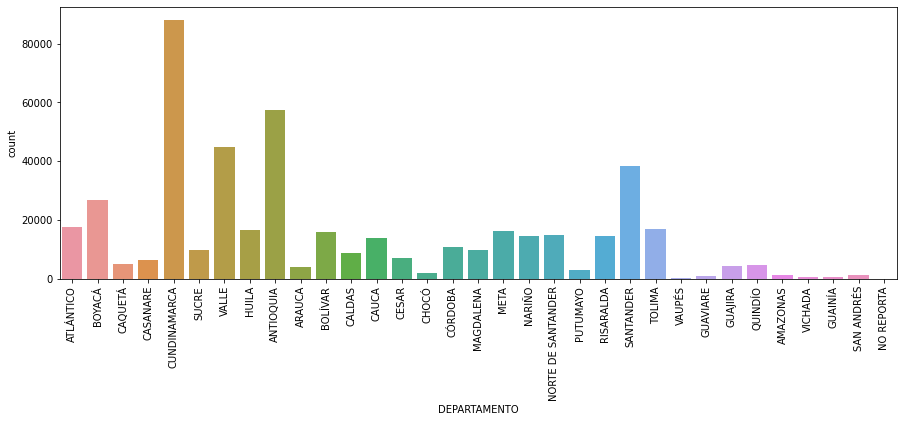

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['DEPARTAMENTO'])
plt.xticks(rotation=90)
plt.show()

In [10]:
data2=data.copy()
data2=data2.drop(['FECHA HECHO', 'CODIGO DANE'], axis=1)
data2.head()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1


In [11]:
data2['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-'],
      dtype=object)

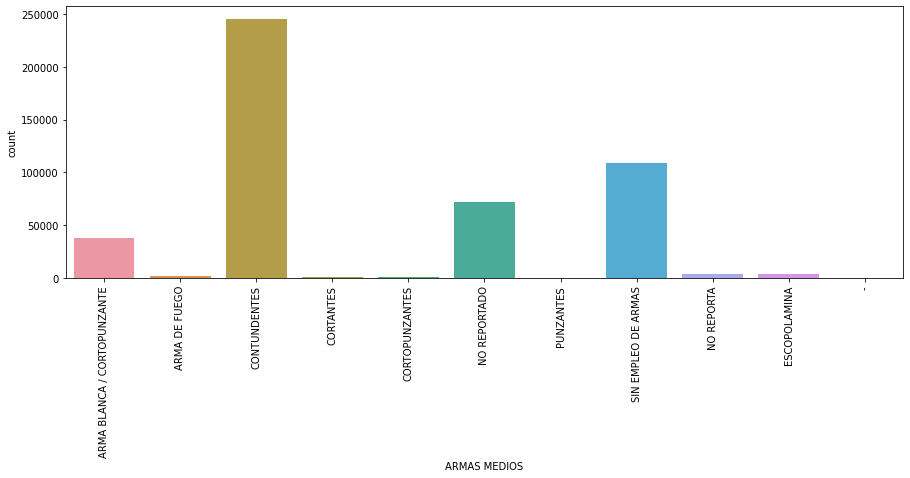

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['ARMAS MEDIOS'])
plt.xticks(rotation=90)
plt.show()

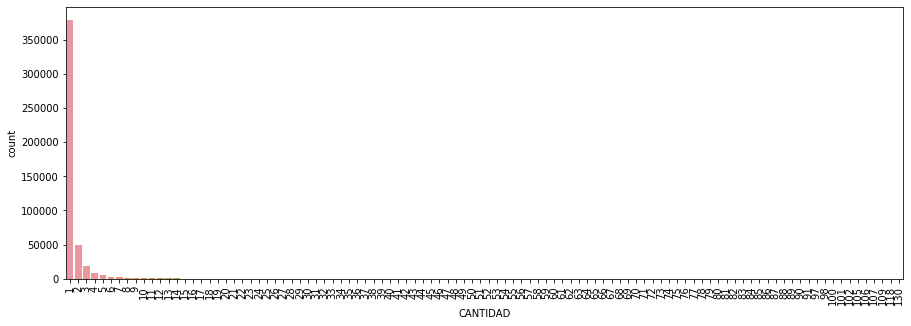

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['CANTIDAD'])
plt.xticks(rotation=90)
plt.show()

**In order to be able to work with the Weapon's data, it should be mapped with numbers**



In [14]:
data2['ARMAS MEDIOS'] = data2['ARMAS MEDIOS'].map({'ARMA BLANCA / CORTOPUNZANTE': 1, 'ARMA DE FUEGO': 2, 'CONTUNDENTES':3, 'CORTANTES': 4, 'CORTOPUNZANTES': 5,'NO REPORTADO': 3, 'PUNZANTES': 6, 'SIN EMPLEO DE ARMAS': 7,
        'NO REPORTA':3, 'ESCOPOLAMINA': 8 ,'-': 3})

In [15]:
data2['ARMAS MEDIOS']

0         1
1         1
2         1
3         1
4         1
         ..
476965    7
476966    7
476967    7
476968    3
476969    3
Name: ARMAS MEDIOS, Length: 476970, dtype: int64

In [16]:
data['MUNICIPIO'].mode()

0    BOGOTÁ D.C. (CT)
dtype: object

In [17]:
data2['MUNICIPIO']=data2['MUNICIPIO'].replace({'NO REPORTA':  'BOGOTÁ D.C. (CT)', '-': 'BOGOTÁ D.C. (CT)'})

In [18]:
data['DEPARTAMENTO'].mode()

0    CUNDINAMARCA
dtype: object

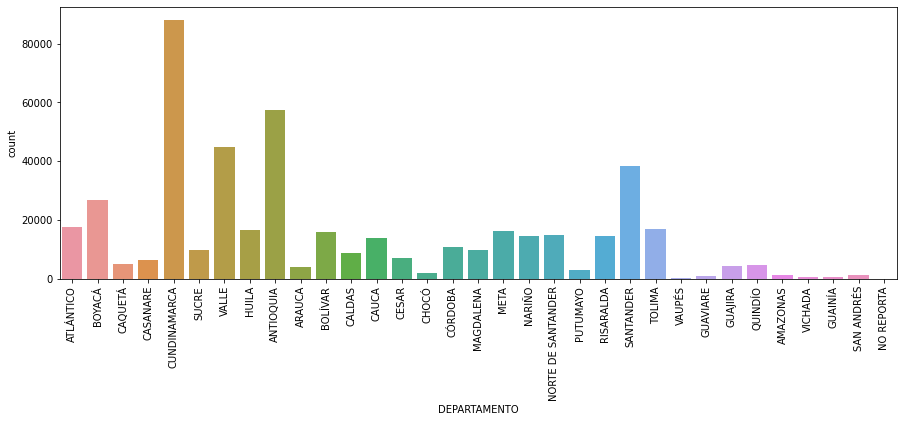

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=data2['DEPARTAMENTO'])
plt.xticks(rotation=90)
plt.show()

In [20]:
data2['DEPARTAMENTO']=data2['DEPARTAMENTO'].replace({'NO REPORTA':  'CUNDINAMARCA', '-': 'CUNDINAMARCA'})

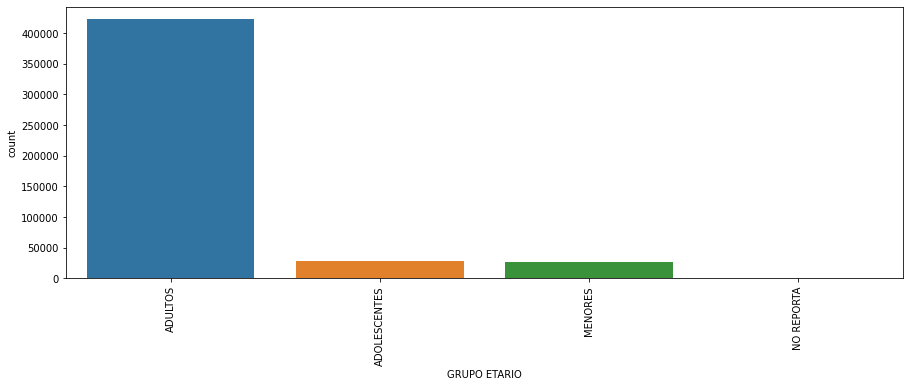

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['GRUPO ETARIO'])
plt.xticks(rotation=90)
plt.show()

In [22]:
data2['GRUPO ETARIO']=data2['GRUPO ETARIO'].replace({'NO REPORTA': 'ADULTOS'})

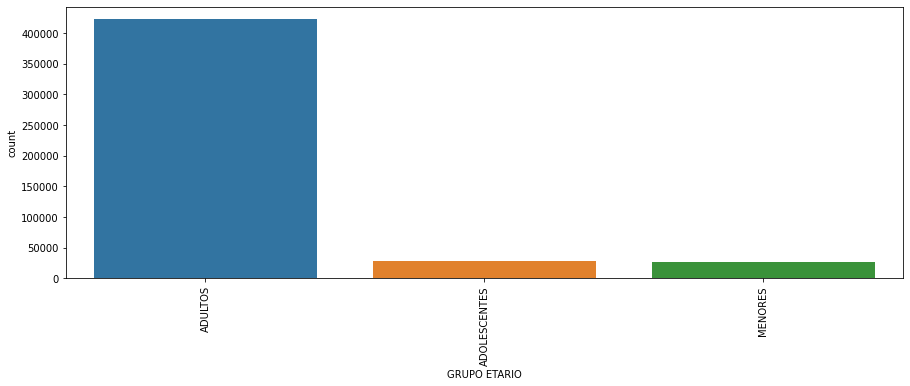

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x=data2['GRUPO ETARIO'])
plt.xticks(rotation=90)
plt.show()

In [24]:
data2['GENERO']=data2['GENERO'].replace({'-': 'FEMENINO', 'NO REPORTA': 'FEMENINO'})

In [25]:
data2['GENERO'].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [26]:
data2.head()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),1,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,1,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,1,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,1,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),1,FEMENINO,ADULTOS,1


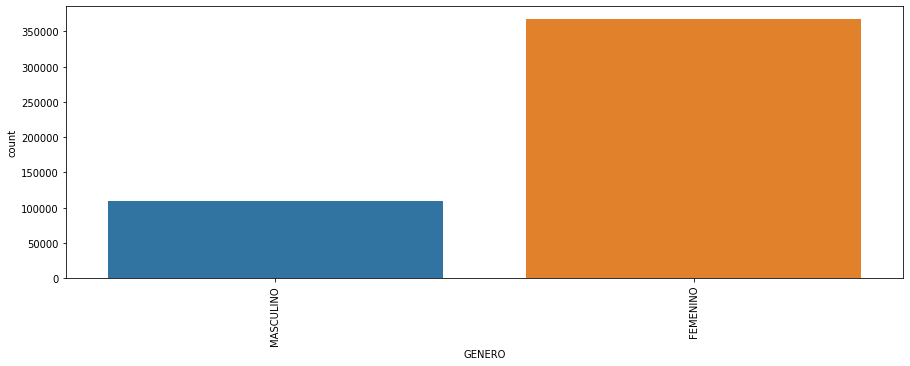

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=data2['GENERO'])
plt.xticks(rotation=90)
plt.show()

In [28]:
trainx=data2.copy()
trainx=trainx.drop('ARMAS MEDIOS', axis=1)

trainy=data2['ARMAS MEDIOS']

In [29]:
trainx_encoded = pd.get_dummies(trainx, columns = ['MUNICIPIO', 'DEPARTAMENTO', 'GENERO','GRUPO ETARIO'])

In [30]:
trainx

,DEPARTAMENTO,MUNICIPIO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),FEMENINO,ADULTOS,1
...,...,...,...,...,...
476965,VICHADA,SANTA ROSALÍA,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,FEMENINO,ADULTOS,1
476967,VICHADA,SANTA ROSALÍA,FEMENINO,ADULTOS,1
476968,CUNDINAMARCA,TAUSA,FEMENINO,ADULTOS,1


In [31]:
trainx_encoded.columns.unique()

Index(['CANTIDAD', 'MUNICIPIO_ABEJORRAL', 'MUNICIPIO_ABREGO',
       'MUNICIPIO_ABRIAQUÍ', 'MUNICIPIO_ACACÍAS', 'MUNICIPIO_ACANDÍ',
       'MUNICIPIO_ACEVEDO', 'MUNICIPIO_ACHÍ', 'MUNICIPIO_AGRADO',
       'MUNICIPIO_AGUA DE DIOS',
       ...
       'DEPARTAMENTO_SUCRE', 'DEPARTAMENTO_TOLIMA', 'DEPARTAMENTO_VALLE',
       'DEPARTAMENTO_VAUPÉS', 'DEPARTAMENTO_VICHADA', 'GENERO_FEMENINO',
       'GENERO_MASCULINO', 'GRUPO ETARIO_ADOLESCENTES', 'GRUPO ETARIO_ADULTOS',
       'GRUPO ETARIO_MENORES'],
      dtype='object', length=1059)

In [32]:
trainx_encoded

,CANTIDAD,MUNICIPIO_ABEJORRAL,MUNICIPIO_ABREGO,MUNICIPIO_ABRIAQUÍ,MUNICIPIO_ACACÍAS,MUNICIPIO_ACANDÍ,MUNICIPIO_ACEVEDO,MUNICIPIO_ACHÍ,MUNICIPIO_AGRADO,MUNICIPIO_AGUA DE DIOS,...,DEPARTAMENTO_SUCRE,DEPARTAMENTO_TOLIMA,DEPARTAMENTO_VALLE,DEPARTAMENTO_VAUPÉS,DEPARTAMENTO_VICHADA,GENERO_FEMENINO,GENERO_MASCULINO,GRUPO ETARIO_ADOLESCENTES,GRUPO ETARIO_ADULTOS,GRUPO ETARIO_MENORES
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476965,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
476966,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
476967,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
476968,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(trainx_encoded, trainy, test_size=0.2, random_state=42)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381576 entries, 400389 to 121958
Columns: 1059 entries, CANTIDAD to GRUPO ETARIO_MENORES
dtypes: int64(1), uint8(1058)
memory usage: 390.8 MB


In [36]:
X_test

,CANTIDAD,MUNICIPIO_ABEJORRAL,MUNICIPIO_ABREGO,MUNICIPIO_ABRIAQUÍ,MUNICIPIO_ACACÍAS,MUNICIPIO_ACANDÍ,MUNICIPIO_ACEVEDO,MUNICIPIO_ACHÍ,MUNICIPIO_AGRADO,MUNICIPIO_AGUA DE DIOS,...,DEPARTAMENTO_SUCRE,DEPARTAMENTO_TOLIMA,DEPARTAMENTO_VALLE,DEPARTAMENTO_VAUPÉS,DEPARTAMENTO_VICHADA,GENERO_FEMENINO,GENERO_MASCULINO,GRUPO ETARIO_ADOLESCENTES,GRUPO ETARIO_ADULTOS,GRUPO ETARIO_MENORES
338033,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
311365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
36383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
98821,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
113213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460466,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
210316,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
194771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
326845,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Building a Model**

As there are multiple discrete outputs, *multinomial logistic regression model* is used for this case




In [37]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [38]:
X_train, y_train = make_classification(n_samples=381576, n_features=1059, n_informative=5, n_redundant=5, n_classes=3, random_state=12)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
model.score(X_train, y_train)

0.8104021217267333

In [40]:
X_test, y_test = make_classification(n_samples=95394, n_features=1059, n_informative=5, n_redundant=5, n_classes=3, random_state=12)

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([1, 0, 2, ..., 2, 2, 1])

In [43]:
y_test

array([2, 0, 1, ..., 1, 1, 2])

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.3008470134390004

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3376837117638426

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.9512706243690436

In [47]:
model.score(X_test, y_test)

0.3376837117638426

In [48]:
print('Train Accuracy: %.2f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.2f' % (model.score(X_test, y_test)))

Train Accuracy: 0.81
Test Accuracy: 0.34
